
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

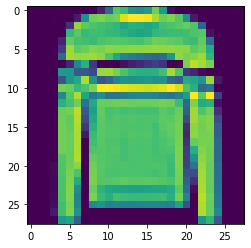

In [4]:
# plt.matshow(X_train[5])
plt.imshow(X_train[5]);

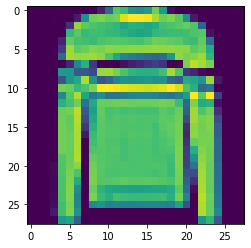

In [5]:
pullover=plt.imshow(X_train[5])

In [6]:
# Checking the shape of one image
X_train[5].shape 

(28, 28)

In [7]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [8]:
y_train[5] 

2

In [9]:
y_train.shape

(60000,)

In [10]:
np.unique(y_train, return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [11]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
classes[int(y_train[5])]

'Pullover'

In [13]:
int(np.random.randint(low=0, high=50000, size=1)) 

25832

In [14]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

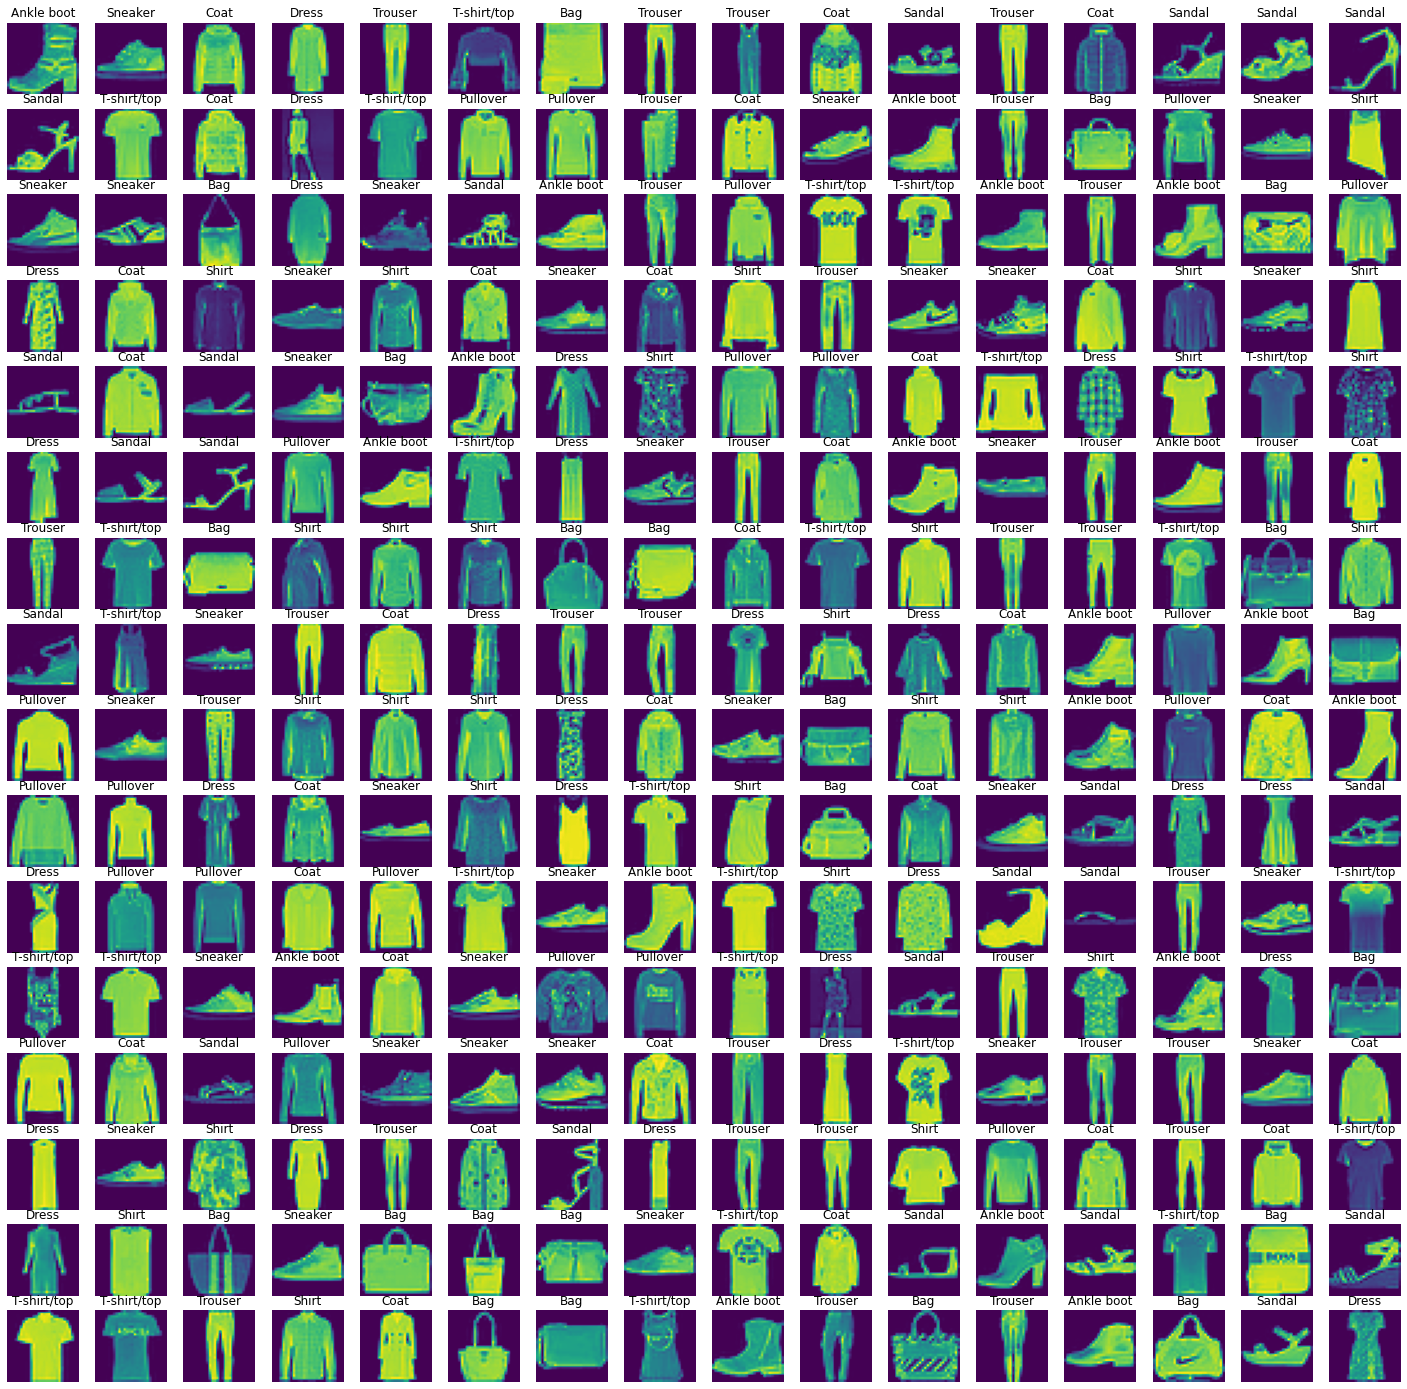

In [15]:
plt.figure(figsize=(25, 25))
for i in range(256):# çizdirilecek resim sayısı 0-255 arasında
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])]) # her bir resime başlık atıyor. aslında classını yazdırıyor.
    plt.imshow(X_train[rand_index])

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [16]:
X_train[5].max()

255

In [17]:
X_test[5].max()

255

In [18]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
X_train[5].min()

0.0

In [20]:
X_train[5].max()

1.0

In [21]:
X_test[5].max()

1.0

**Reshape the X into 4 dimension**

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)  
Y_test.shape

(10000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1))) # stride default pool size göre ayarlı, pool size 2 ,2  ise strides 2 oluyor. tanımlarsan değişir

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [31]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test,Y_test))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3704 - accuracy: 0.8689 - val_loss: 0.3097 - val_accuracy: 0.8859
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2524 - accuracy: 0.9100 - val_loss: 0.2813 - val_accuracy: 0.9036
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2160 - accuracy: 0.9233 - val_loss: 0.2861 - val_accuracy: 0.8984
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1929 - accuracy: 0.9321 - val_loss: 0.2994 - val_accuracy: 0.9043
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1786 - accuracy: 0.9389 - val_loss: 0.2893 - val_accuracy: 0.9090
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1630 - accuracy: 0.9436 - val_loss: 0.3194 - val_accuracy: 0.9039
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1523 - accuracy: 0.9478 - val_loss: 0.3524 - val_ac

**Plot values of metrics you used in your model.**

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.370359,0.868917,0.309681,0.8859
1,0.252397,0.910033,0.281326,0.9036
2,0.215995,0.923333,0.286059,0.8984
3,0.192856,0.932117,0.299414,0.9043
4,0.178552,0.938900,0.289300,0.9090


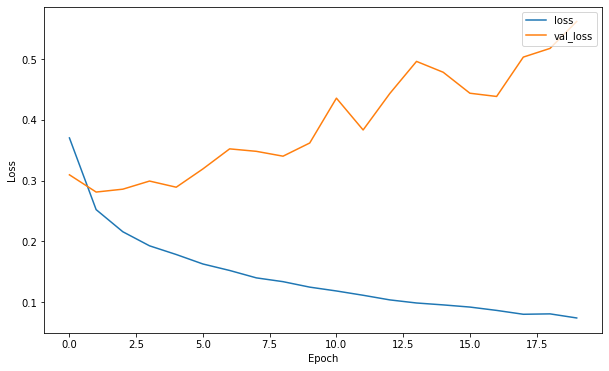

In [34]:
plt.figure(figsize=(10,6))
plt.plot(loss_df.loss, label="loss")
plt.plot(loss_df.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

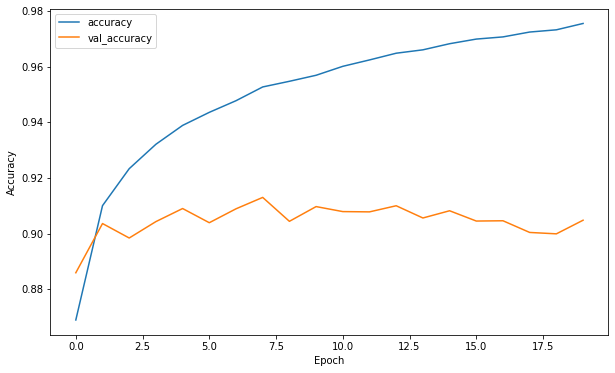

In [35]:
plt.figure(figsize=(10,6))
plt.plot(loss_df.accuracy, label="accuracy")
plt.plot(loss_df.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [136]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [137]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [138]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4709 - accuracy: 0.8334 - val_loss: 0.3234 - val_accuracy: 0.8762
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3341 - accuracy: 0.8791 - val_loss: 0.2864 - val_accuracy: 0.8936
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2956 - accuracy: 0.8912 - val_loss: 0.2735 - val_accuracy: 0.8950
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2666 - accuracy: 0.9011 - val_loss: 0.2732 - val_accuracy: 0.8991
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2435 - accuracy: 0.9096 - val_loss: 0.2666 - val_accuracy: 0.9032
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2273 - accuracy: 0.9166 - val_loss: 0.2643 - val_accuracy: 0.9078
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2129 - accuracy: 0.9204 - val_loss: 0.2583 - val_ac

In [163]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 25, 25, 28)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 17500)             0         
                                                                 
 dense_36 (Dense)            (None, 128)               2240128   
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                     

**Plot values of metrics you used in your model.**

In [139]:
model.metrics_names

['loss', 'accuracy']

In [140]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.470895,0.833383,0.323441,0.8762
1,0.334122,0.879083,0.286443,0.8936
2,0.295591,0.891233,0.273464,0.8950
3,0.266623,0.901083,0.273245,0.8991
4,0.243545,0.909567,0.266648,0.9032


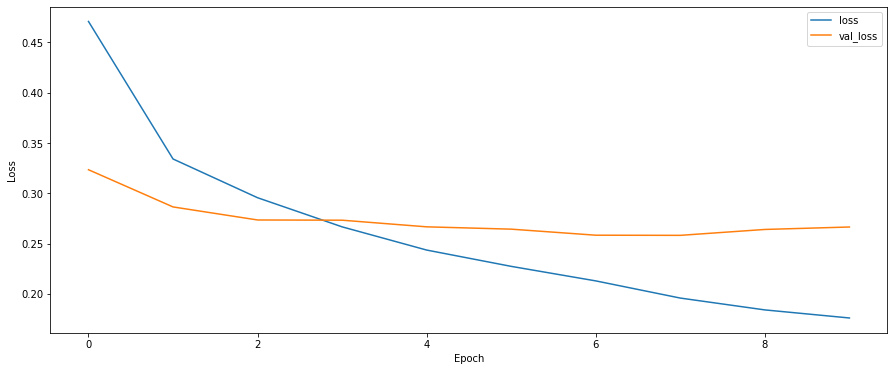

In [141]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

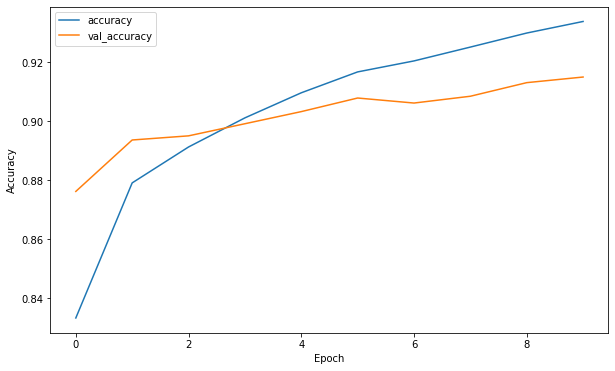

In [149]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [150]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 1s 4ms/step - loss: 0.2665 - accuracy: 0.9149
[0.26647788286209106, 0.914900004863739]


In [151]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [152]:
preds = model.predict(X_test)

In [153]:
predictions = np.argmax(preds, axis=1)

In [154]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.93      0.91      0.92      1000
           4       0.81      0.90      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.76      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [148]:
print(confusion_matrix(y_test, predictions))

[[881   1  16   9   4   0  85   0   4   0]
 [  1 977   2  13   4   0   2   0   1   0]
 [ 16   0 829   8  77   0  70   0   0   0]
 [ 16   3  12 907  34   0  28   0   0   0]
 [  1   0  34  23 903   0  38   0   1   0]
 [  0   0   0   0   0 979   0  10   0  11]
 [ 92   0  36  18  89   0 757   0   8   0]
 [  0   0   0   0   0   9   0 973   0  18]
 [  2   1   0   2   3   2   3   2 985   0]
 [  0   0   0   0   0   6   0  35   1 958]]


# Prediction

In [155]:
my_image = X_test[44]

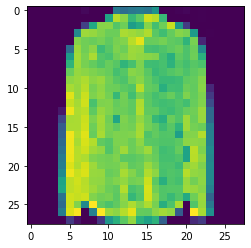

In [156]:
plt.imshow(my_image.reshape(28,28));

In [157]:
image_prediction=model.predict(my_image.reshape(1,28,28,1))

In [158]:
image_prediction

array([[2.8363763e-06, 4.9868817e-11, 4.0918574e-04, 2.0136476e-07,
        4.5654852e-02, 7.2233894e-12, 9.5393300e-01, 4.4440769e-16,
        4.7146536e-08, 1.3064022e-13]], dtype=float32)

In [159]:
np.argmax(image_prediction, axis=1)

array([6])

In [160]:
result=np.argmax(image_prediction, axis=1)

In [161]:
result

array([6])

In [162]:
classes[int(result)]

'Shirt'

# End of Assignment